In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.pipeline import Pipeline
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [2]:
#to upload csv files to 
fake_side_news=pd.read_csv('WRONG.csv')
true_side_news=pd.read_csv('RIGHT.csv')

In [3]:
# how the presentation of data in dataset files
fake_side_news.head(10)
true_side_news.tail(10)

,title,text,subject,date
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017"
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017"
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017"
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017"
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017"
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [4]:
true_side_news["text"][12121]

'JERUSALEM (Reuters) - Nazareth, the Israeli Arab city where Jesus is thought to have been raised, will celebrate Christmas as usual, its mayor said, denying the festivities would be curtailed in protest at the U.S. decision to recognize Jerusalem as Israel s capital. On Wednesday, a city spokesman said there would be some cuts to the celebrations to protest against President Donald Trump s decision on Jerusalem that angered Palestinians as well as U.S. allies in the Middle East and the rest of the world. Mayor Ali Salam told Reuters on Saturday that three singers who had been due to perform would not appear. He gave no reason for their absence, but said that the celebrations would proceed as normal.  I don t know why people thought that there would be cuts to the celebrations. Everything, except for three singers who will not be coming, will be held as normal. We have already welcomed 60,000 people to the city today,  Salam said. Nazareth, the largest Arab town in Israel with a popula

subject
Government News    1570
Middle-east         778
News               9050
US_News             783
left-news          4459
politics           6841
Name: text, dtype: int64


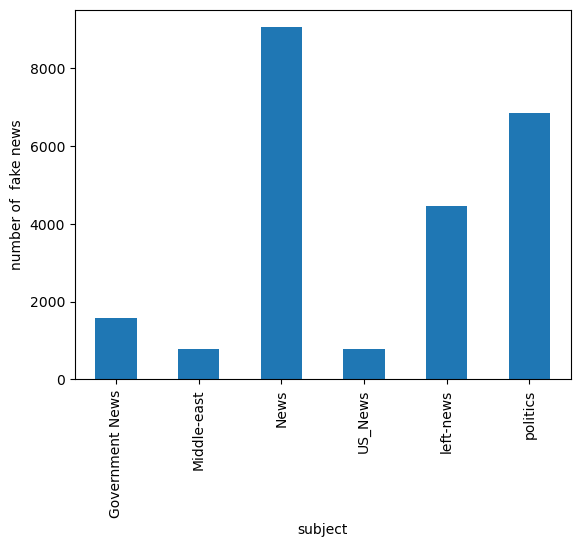

In [5]:
# to check categories of the subject on fake data set
print(fake_side_news.groupby(['subject'])['text'].count())
fake_side_news.groupby(['subject'])['text'].count().plot(kind="bar")
plt.ylabel('number of  fake news')
plt.show()

subject
politicsNews    11272
worldnews       10145
Name: text, dtype: int64


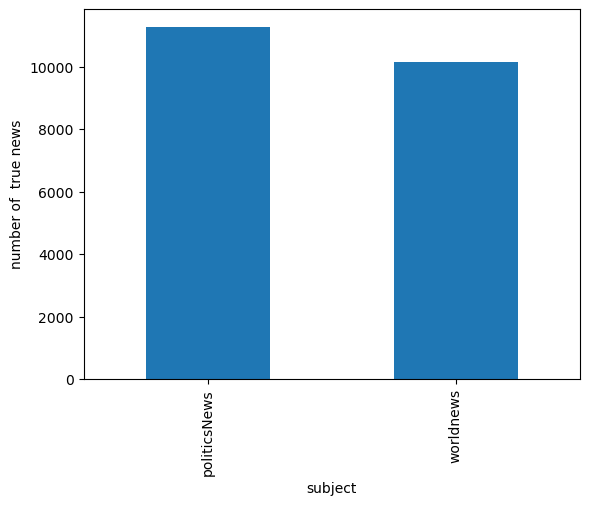

In [6]:
# to check categories of the subject on true data set

print(true_side_news.groupby(['subject'])['text'].count())
true_side_news.groupby(['subject'])['text'].count().plot(kind="bar")
plt.ylabel('number of  true news')
plt.show()

In [7]:
# to check different types of subject that are present in subject and their occurance fake  in dataset
fake_side_news['subject'].value_counts()

subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

In [8]:
# occarance in true dataset
true_side_news['subject'].value_counts()

subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64

In [9]:
#adding new column to label dataset
fake_side_news['category']=0
true_side_news['category']=1
fake_side_news.head()

,title,text,subject,date,category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [10]:
true_side_news.tail(10)

,title,text,subject,date,category
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [11]:
#merging both datasets into single one dataset
data_set=pd.concat([fake_side_news,true_side_news],ignore_index=True)

In [12]:
data_set.head()


,title,text,subject,date,category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [13]:
data_set.tail(30000)

,title,text,subject,date,category
14898,MEET THE TRUMPS: In Case You Missed It….Here’s...,"Even Barbara Walters, a master manipulator of ...",politics,"Nov 23, 2015",0
14899,WOW! OBAMA MEDIA ALLY EXPOSES HUGE LIE: Why Ob...,President Obama on ISIS: They re a bunch of k...,politics,"Nov 23, 2015",0
14900,SNIVELING COWARDS AT CNN Caught Editing Trump ...,If the Republican Party really cared about win...,politics,"Nov 22, 2015",0
14901,Trump Says He’ll Bring Back Controversial Inte...,We reported about Trump making similar comment...,politics,"Nov 22, 2015",0
14902,WOW! DEMOCRATS Offer Tips On How To Convince F...,When we found this insane article on the Occup...,politics,"Nov 22, 2015",0
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [14]:
new_var=data_set["text"][0]

In [15]:
new_var

'Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t ev

In [16]:
data_set.shape

(44898, 5)

In [17]:
#most common words in the datasets to analyze them accordingly
from collections import Counter
import nltk
#downloading stopwords and punkt
nltk.download('stopwords')
nltk.download('punkt')

def unique_words(texts, num_words=8):
    all_unique = []
    for text in texts:
        all_unique.extend(nltk.word_tokenize(text.lower()))
    stopwords = set(nltk.corpus.stopwords.words('english'))
    unique_words = [word for word in all_unique if word.isalpha() and word not in stopwords]
    final_word = Counter(unique_words)
    return final_word.most_common(num_words)

f_unique = unique_words(fake_side_news['text'])
r_unique = unique_words(true_side_news['text'])

print('Real Side Unique Words:', r_unique)
print('Fake Side Unique Words:', f_unique)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ahtishamsaleem/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ahtishamsaleem/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Real Side Unique Words: [('said', 99037), ('trump', 54249), ('would', 31526), ('reuters', 28412), ('president', 26397), ('state', 19728), ('government', 18288), ('new', 16784)]
Fake Side Unique Words: [('trump', 74241), ('said', 31149), ('people', 26015), ('president', 25772), ('would', 23461), ('one', 22995), ('clinton', 18085), ('obama', 17920)]


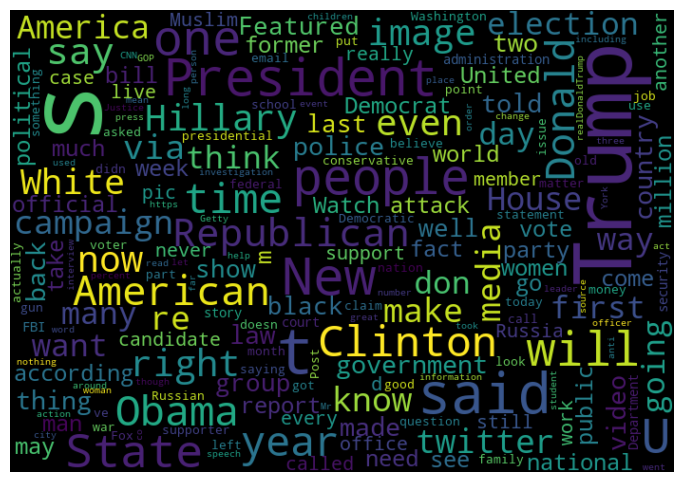

In [18]:
# Word cloud for fake news in the dataset
import matplotlib.pyplot as plt
!pip install wordcloud
import wordcloud
from wordcloud import WordCloud

fake_side_news_data = data_set[data_set["category"] == 0]
data_words = ' '.join([text for text in fake_side_news_data.text])

pic_fake = WordCloud(width= 699, height= 487,
                          max_font_size = 110,
                          collocations = False).generate(data_words)

plt.figure(figsize=(9,6))
plt.imshow(pic_fake , interpolation='bilinear')
plt.axis("off")
plt.show()

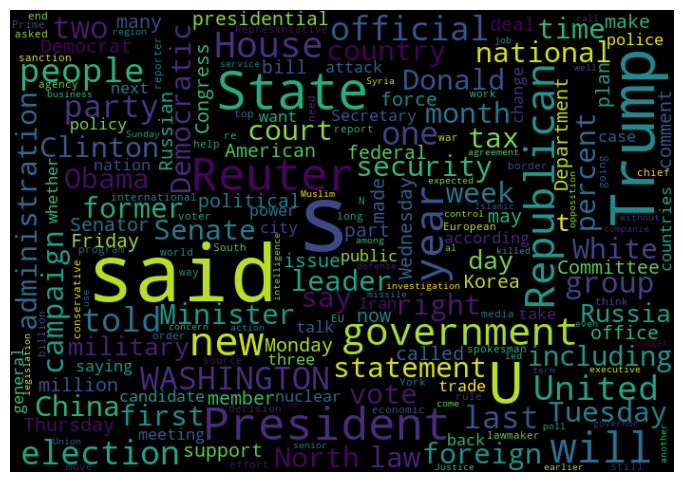

In [19]:
# Word cloud for true news in the dataset
import matplotlib.pyplot as plt
!pip install wordcloud
import wordcloud
from wordcloud import WordCloud

right_side_news_data = data_set[data_set["category"] == 1]
right_data= ' '.join([text for text in right_side_news_data.text])

right_pic = WordCloud(width= 699, height= 487,
                          max_font_size = 98,
                          collocations = False).generate(right_data)

plt.figure(figsize=(19,6))
plt.imshow(right_pic, interpolation='bilinear')
plt.axis("off")
plt.show()

/var/folders/09/nxg11yz97pn8624jzzr4v9sm0000gn/T/ipykernel_81570/825967408.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


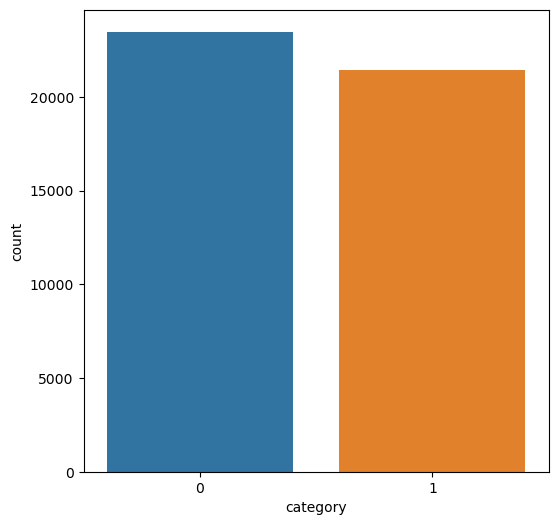

In [20]:
#VISUALS OF DATASETS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(6,6))
sns.countplot(x="category", data=data_set)
fig.show()

In [21]:
#taking only 2 colums which are required for us 
data_set=data_set[["text","category"]]


In [22]:
data_set.head(10)

,text,category
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


In [23]:
data_set.tail()

,text,category
44893,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
44894,"LONDON (Reuters) - LexisNexis, a provider of l...",1
44895,MINSK (Reuters) - In the shadow of disused Sov...,1
44896,MOSCOW (Reuters) - Vatican Secretary of State ...,1
44897,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,1


In [24]:
##function to check is there any null value in the dataset
data_set.isnull().sum() 

text        0
category    0
dtype: int64

In [25]:
# function to check is there any strings that contains nothing
empt_str_data=[]
for index,text in data_set["text"].items():
    if text.isspace():
        empt_str_data.append(index)
len(empt_str_data)        
                    

631

In [26]:
empt_str_data

[10923,
 11041,
 11190,
 11225,
 11236,
 11241,
 11247,
 11249,
 11267,
 11268,
 11283,
 11284,
 11285,
 11289,
 11290,
 11292,
 11295,
 11296,
 11301,
 11303,
 11304,
 11305,
 11309,
 11314,
 11317,
 11319,
 11322,
 11330,
 11334,
 11335,
 11340,
 11343,
 11348,
 11351,
 11352,
 11357,
 11371,
 11373,
 11374,
 11382,
 11397,
 11402,
 11403,
 11409,
 11410,
 11412,
 11415,
 11419,
 11421,
 11427,
 11431,
 11432,
 11440,
 11448,
 11450,
 11453,
 11462,
 11464,
 11465,
 11472,
 11473,
 11475,
 11478,
 11489,
 11491,
 11493,
 11494,
 11501,
 11505,
 11507,
 11520,
 11531,
 11532,
 11533,
 11538,
 11542,
 11547,
 11549,
 11551,
 11559,
 11563,
 11581,
 11585,
 11589,
 11590,
 11614,
 11624,
 11625,
 11627,
 11631,
 11636,
 11637,
 11643,
 11650,
 11658,
 11661,
 11672,
 11679,
 11681,
 11684,
 11686,
 11688,
 11692,
 11708,
 11718,
 11729,
 11739,
 11753,
 11765,
 11768,
 11777,
 11782,
 11786,
 11788,
 11792,
 11793,
 11803,
 11806,
 11813,
 11821,
 11831,
 11832,
 11841,
 11844,
 11848,


In [27]:
data_set["text"][12783]

' '

In [28]:
data_set.shape

(44898, 2)

In [29]:
#dropping emptry string value 
data_set.drop(empt_str_data,inplace=True)

In [30]:
data_set.shape

(44267, 2)

In [31]:
#function creation to preprocess the text 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

nltk.download('wordnet')

d_stopword = set(stopwords.words('english'))
data_stm = PorterStemmer()


def change_prepro (text):
    # uncapitalizie the text in the dataset
    text = text.lower()

    # Remove punctuation and digits fro 
    text = text.translate(str.maketrans('', '', string.punctuation + string.digits))

    # Tokenize the  text
    d_digit = word_tokenize(text)

    # Remove stop words from the text
    d_digit = [word for word in d_digit if word not in d_stopword]

    # Stem the words
    words = [data_stm.stem(word) for word in d_digit]
   
        # joining the words back in the string
    text = ' '.join(d_digit)

    return text


data_set['text'] = data_set['text'].apply(change_prepro)


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ahtishamsaleem/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [32]:
data_set['text'].head(10)


0    donald trump wish americans happy new year lea...
1    house intelligence committee chairman devin nu...
2    friday revealed former milwaukee sheriff david...
3    christmas day donald trump announced would bac...
4    pope francis used annual christmas day message...
5    number cases cops brutalizing killing people c...
6    donald trump spent good portion day golf club ...
7    wake yet another court decision derailed donal...
8    many people raised alarm regarding fact donald...
9    might thought get break watching people kiss d...
Name: text, dtype: object

In [33]:
data_set['text'][11]

'republicans working overtime trying sell scam tax bill public something directly targets middleclass workingclass families financial relief nothing could truth getting hammered repeatedly speaking cnbc paul ryan going full throttle trying convince us paltry savings getting actually wait big moneybut go usual talking points smug look someone grew wealthy family muster talking know ryan claimed per year families living paychecktopaycheck see extremely significant decided amend say savings might nothing family earning per year true people living new york california falsethose two states trump loyal subjects insist stripping vote totals claim trump actually popular vote watch ryan completely dismiss struggling families living blue states belowif living paychecktopaycheck half people country got tax cut next year nothing pictwittercomtktrmqra paul ryan speakerryan december someone needs reach computer television wipe smugness face height arrogance insult imply struggling families either tw

In [34]:
C = data_set.text.values
D = data_set.category.values


In [35]:
print(C)
print (D)

['donald trump wish americans happy new year leave instead give shout enemies haters dishonest fake news media former reality show star one job country rapidly grows stronger smarter want wish friends supporters enemies haters even dishonest fake news media happy healthy new year president angry pants tweeted great year america country rapidly grows stronger smarter want wish friends supporters enemies haters even dishonest fake news media happy healthy new year great year america donald j trump realdonaldtrump december trump tweet went welll expectwhat kind president sends new year greeting like despicable petty infantile gibberish trump lack decency even allow rise gutter long enough wish american citizens happy new year bishop talbert swan talbertswan december one likes calvin calvinstowell december impeachment would make great year america also accept regaining control congress miranda yaver mirandayaver december hear talk include many people hate wonder hate alan sandoval alansand

In [36]:
# Machine Learning Algoritham Naive Bayes
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from joblib import dump

In [37]:
#spliting the data into trainning and test datsets
data_train,data_test,val_train,val_test = train_test_split(data_set['text'], data_set.category, test_size=0.2, random_state=42)

In [38]:
#dictionary to show values of accuracy
char_acc = dict()
# NAIVE BAYES
Algo_nb = MultinomialNB()
NB_pipe= Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', Algo_nb)])

NB_model = NB_pipe.fit(data_train, val_train)
predict_NB = NB_model.predict(data_test)
NB_acc = accuracy_score(val_test, predict_NB)
NB_pre = precision_score(val_test, predict_NB)
NB_rec = recall_score(val_test, predict_NB)
NB_f1 = f1_score(val_test, predict_NB)

print('Accuracy of Naive Bayes:', NB_acc)
print('Precision of Naive Bayes:', NB_pre)
print('Recall of Naive Bayes:', NB_rec)
print('F1 Score of Naive Bayes:', NB_f1)

char_acc['NB'] = round(accuracy_score(val_test, predict_NB)*100,2)

# saving the Naive bayes Model


dump(NB_pipe, 'Naive_Bayes.joblib')


Accuracy of Naive Bayes: 0.9392365032753558
Precision of Naive Bayes: 0.9333333333333333
Recall of Naive Bayes: 0.9412040290466152
F1 Score of Naive Bayes: 0.9372521576860275


['Naive_Bayes.joblib']

In [39]:
#function to plot the confusion matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
def con_matrix_fun(con_out,rt):
    
    confu_out = metrics.ConfusionMatrixDisplay(confusion_matrix = con_out, display_labels=['Fake', 'Real'])
    plt.figure(figsize=(5.7, 7.7))
    confu_out.plot(cmap='Greens', values_format='d')
    plt.text(0.5, 1.1, rt, ha='center', va='center', transform=plt.gca().transAxes, fontsize=11, fontweight='bold')
    plt.show()
    

In [40]:
#NaiveBayes Confusion Matrix
from sklearn.metrics import confusion_matrix
con_mat = metrics.confusion_matrix(val_test, predict_NB)
print(con_mat)

[[4298  287]
 [ 251 4018]]


<Figure size 570x770 with 0 Axes>

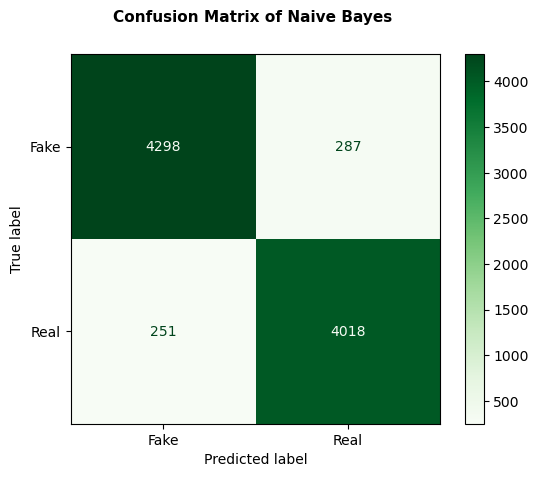

In [41]:
con_out = metrics.confusion_matrix(val_test, predict_NB )
rt="Confusion Matrix of Naive Bayes "
con_matrix_fun(con_out,rt)

In [42]:
#Logistic Regression ML Algoritham
from sklearn.linear_model import LogisticRegression
# Vectorizing and applying TF-IDF using a pipeline
LR_pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression(random_state=42))])


LR_model = LR_pipe.fit(data_train, val_train)

# prediction on testing data
predict_LR = LR_model.predict(data_test)
#print("accuracy: {}%".format(round(accuracy_score(val_test, predict_LR)*100,2)))
char_acc['LR'] = round(accuracy_score(val_test, predict_LR)*100,2)
LR_acc = accuracy_score(val_test, predict_LR)
LR_prec = precision_score(val_test, predict_LR)
LR_rec = recall_score(val_test, predict_LR)
LR_f1 = f1_score(val_test, predict_LR)

print('Accuracy of Logistice Regression:', LR_acc)
print('Precision of Logistice Regression:', LR_prec)
print('Recall of Logistice Regression:', LR_rec)
print('F1 Score of Logistice Regression:', LR_f1)


dump(LR_pipe, 'Logistic_Regression.joblib')

Accuracy of Logistice Regression: 0.9866726903094647
Precision of Logistice Regression: 0.9857243154692253
Recall of Logistice Regression: 0.9866479269149684
F1 Score of Logistice Regression: 0.986185904940295


['Logistic_Regression.joblib']

<Figure size 570x770 with 0 Axes>

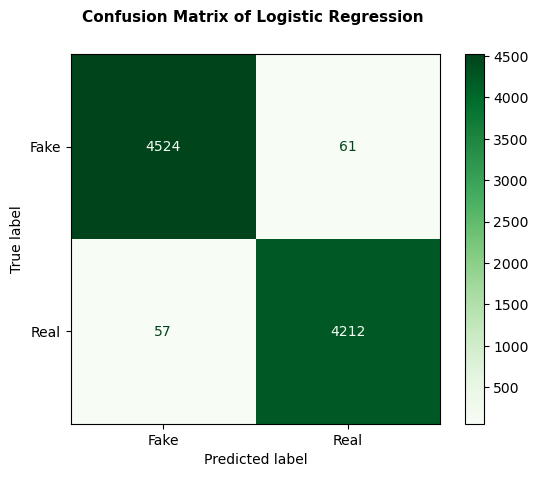

In [43]:
# confusion matrix of Logistic Regression
con_out = metrics.confusion_matrix(val_test, predict_LR)
rt="Confusion Matrix of Logistic Regression "
con_matrix_fun(con_out,rt)

In [44]:
#Decision tree ML Algoritham
from sklearn.tree import DecisionTreeClassifier

D_tree = DecisionTreeClassifier(random_state=42)
# Vectorizing and applying TF-IDF using a pipeline
DT_pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', D_tree)])

# Fitting the model on train data
DT_model = DT_pipe.fit(data_train, val_train)

# prediction on testing data
predict_DT = DT_model.predict(data_test)
print("accuracy: {}%".format(round(accuracy_score(val_test, predict_DT)*100,2)))
char_acc['DT'] = round(accuracy_score(val_test, predict_DT)*100,2)
DT_acc = accuracy_score(val_test, predict_DT)
DT_prec = precision_score(val_test, predict_DT)
DT_rec = recall_score(val_test, predict_DT)
DT_f1 = f1_score(val_test, predict_DT)

print('Accuracy of Decision Tree:', DT_acc)
print('Precision of Decision Tree:', DT_prec)
print('Recall of Decision Tree:', DT_rec)
print('F1 Score of Decision Tree:', DT_f1)
from joblib import dump

dump(DT_pipe, 'Decision_Tree_Model.joblib')

accuracy: 99.54%
Accuracy of Decision Tree: 0.9953693245990513
Precision of Decision Tree: 0.9946186242395882
Recall of Decision Tree: 0.9957835558678847
F1 Score of Decision Tree: 0.995200749151352


['Decision_Tree_Model.joblib']

<Figure size 570x770 with 0 Axes>

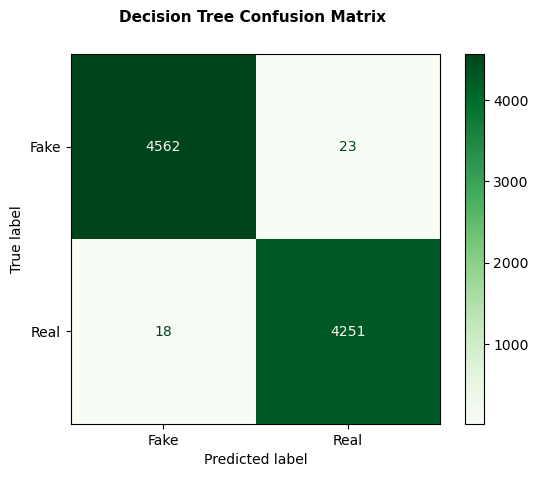

In [45]:
# confusion matrix of Decision Tree
con_out = metrics.confusion_matrix(val_test, predict_DT)
rt="Decision Tree Confusion Matrix "
con_matrix_fun(con_out,rt)

In [46]:
# SMV MACHINE LEARNING MODEL
from sklearn import svm

#creating the variable for svm with linear kernal
algo_svm = svm.SVC(kernel='linear') 

SVM_pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', algo_svm)])

SVM_model= SVM_pipe.fit(data_train, val_train)
predict_SVM = SVM_model.predict(data_test)
print("accuracy: {}%".format(round(accuracy_score(val_test, predict_SVM)*100,2)))
char_acc['SVM'] = round(accuracy_score(val_test, predict_SVM)*100,2)
dump(SVM_pipe, 'SVM_algoritham.joblib')

accuracy: 99.42%


['SVM_algoritham.joblib']

In [47]:


svm_acc = accuracy_score(val_test, predict_SVM)
svm_prec = precision_score(val_test, predict_SVM)
svm_rec = recall_score(val_test, predict_SVM)
svm_f1 = f1_score(val_test, predict_SVM)

print('Accuracy of SVM:', svm_acc)
print('Precision of SVM:', svm_prec)
print('Recall of SVM:', svm_rec)
print('F1 Score of SVM:', svm_f1)

Accuracy of SVM: 0.9942398915744296
Precision of SVM: 0.9932179607109448
Recall of SVM: 0.9948465682829702
F1 Score of SVM: 0.994031597425395


<Figure size 570x770 with 0 Axes>

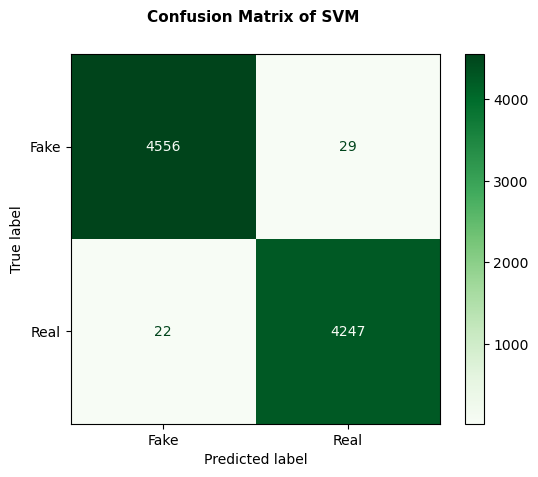

In [48]:
con_out = metrics.confusion_matrix(val_test, predict_SVM)
rt="Confusion Matrix of SVM "
con_matrix_fun(con_out,rt)

In [49]:
#Random forest classifeir
from sklearn.ensemble import RandomForestClassifier

#variable name for RF
Ran_For = RandomForestClassifier(n_estimators=100,random_state=42)
RF_pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', Ran_For)])

RF_model= RF_pipe.fit(data_train, val_train)
RF_predict = RF_model.predict(data_test)
RF_acc = accuracy_score(val_test, RF_predict)
RF_prec = precision_score(val_test, RF_predict)
RF_rec = recall_score(val_test, RF_predict)
RF_f1 = f1_score(val_test, RF_predict)

print('Accuracy of Random Forest:', RF_acc)
print('Precision of Random Forest:', RF_prec)
print('Recall of Random Forest:', RF_rec)
print('F1 Score of Random Forest:', RF_f1)
print("accuracy: {}%".format(round(accuracy_score(val_test, RF_predict)*100,2)))
char_acc['RFC'] = round(accuracy_score(val_test, RF_predict)*100,2)
from joblib import dump
dump(RF_pipe, 'Random_Forest.joblib')

Accuracy of Random Forest: 0.9914163090128756
Precision of Random Forest: 0.9910986179433122
Recall of Random Forest: 0.9910986179433122
F1 Score of Random Forest: 0.9910986179433122
accuracy: 99.14%


['Random_Forest.joblib']

<Figure size 570x770 with 0 Axes>

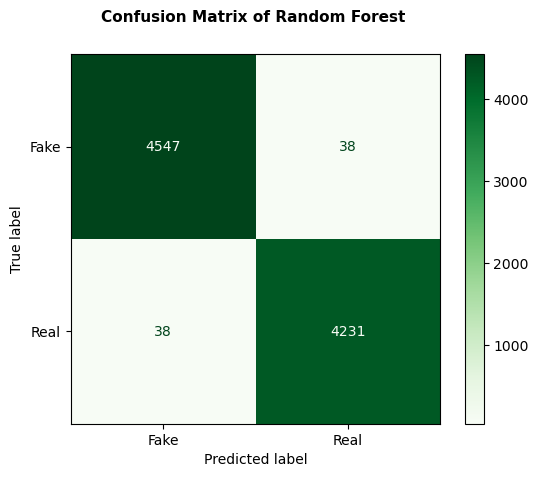

In [50]:
con_out = metrics.confusion_matrix(val_test, RF_predict)
rt="Confusion Matrix of Random Forest "
con_matrix_fun(con_out,rt)

In [51]:
#ENSEMBLES BOOSTING CLASSIFIER
from sklearn.ensemble import GradientBoostingClassifier
G_B_C = GradientBoostingClassifier(random_state=0)
GBC_pipe= Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', G_B_C)])

GBC_model= GBC_pipe.fit(data_train, val_train)
GBC_predict = GBC_model.predict(data_test)
print("accuracy: {}%".format(round(accuracy_score(val_test, GBC_predict)*100,2)))

GBC_acc = accuracy_score(val_test, GBC_predict)
GBC_prec = precision_score(val_test, GBC_predict)
GBC_rec = recall_score(val_test, GBC_predict)
GBC_f1 = f1_score(val_test, GBC_predict)

print('Accuracy of boosting:', GBC_acc)
print('Precision of boosting:', GBC_prec)
print('Recall of boosting:', GBC_rec)
print('F1 Score of boosting:', GBC_f1)
char_acc['GBC'] = round(accuracy_score(val_test, GBC_predict)*100,2)
dump(GBC_pipe, 'Boosting.joblib')

accuracy: 99.65%
Accuracy of boosting: 0.9964987576236729
Precision of boosting: 0.9957884885353299
Recall of boosting: 0.9969547903490279
F1 Score of boosting: 0.9963712981388271


['Boosting.joblib']

<Figure size 570x770 with 0 Axes>

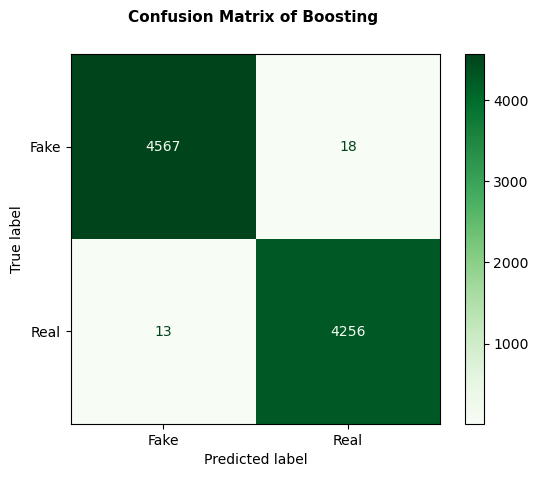

In [52]:
con_out = metrics.confusion_matrix(val_test, GBC_predict)
rt="Confusion Matrix of Boosting "
con_matrix_fun(con_out,rt)

In [53]:
# ENSEMBLES METHOD Bagging
from sklearn.ensemble import BaggingClassifier
start_base = DecisionTreeClassifier()
Bag_cls = BaggingClassifier(estimator=start_base, n_estimators=100, random_state=42)

In [54]:
BAG_pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', Bag_cls)])
model_bag= BAG_pipe.fit(data_train, val_train)
bag_predict= model_bag.predict(data_test)
print("accuracy: {}%".format(round(accuracy_score(val_test, bag_predict)*100,2)))

BAG_acc = accuracy_score(val_test, bag_predict)
BAG_prec = precision_score(val_test, bag_predict)
BAG_rec = recall_score(val_test, bag_predict)
BAG_f1 = f1_score(val_test, bag_predict)

print('Accuracy of bagging:', BAG_acc)
print('Precision of bagging:', BAG_prec)
print('Recall of bagging:', BAG_rec)
print('F1 Score of bagging:', BAG_f1)
char_acc['BAG'] = round(accuracy_score(val_test, bag_predict)*100,2)
dump(BAG_pipe, 'Bagging.joblib')

accuracy: 99.75%
Accuracy of bagging: 0.9975152473458324
Precision of bagging: 0.9974232841414852
Recall of bagging: 0.9974232841414852
F1 Score of bagging: 0.9974232841414852


['Bagging.joblib']

<Figure size 570x770 with 0 Axes>

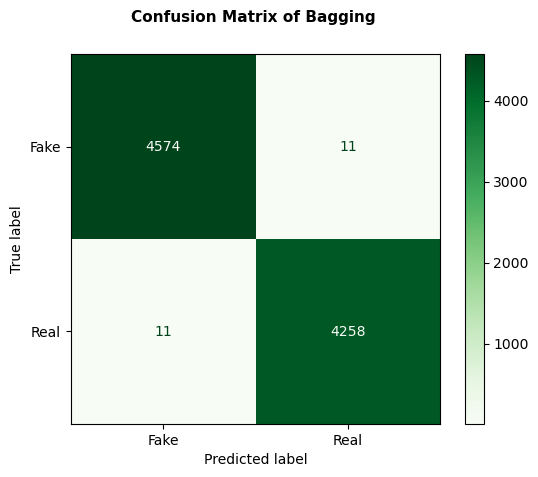

In [55]:
#confusion matrix for bagging
con_out = metrics.confusion_matrix(val_test, bag_predict)
rt="Confusion Matrix of Bagging "
con_matrix_fun(con_out,rt)


In [56]:
# importing voting classifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report





# Combine pipelines using a voting classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', LR_pipe),
    ('dt', DT_pipe),
    ('rf', RF_pipe)
], voting='soft')

# Train the voting classifier
voting_clf.fit(data_train, val_train)

# Predict on the test set
Voting_predict = voting_clf.predict(data_test)

# Evaluate the model
accuracy = accuracy_score(val_test, Voting_predict)
report = classification_report(val_test,Voting_predict)

print(f'Accuracy: {accuracy}')
VOT_acc = accuracy_score(val_test, Voting_predict)
VOT_prec = precision_score(val_test, Voting_predict)
VOT_rec = recall_score(val_test, Voting_predict)
VOT_f1 = f1_score(val_test, Voting_predict)

print('Accuracy of Vooting:', VOT_acc)
print('Precision of Vooting:', VOT_prec)
print('Recall of Vooting:', VOT_rec)
print('F1 Score of Vooting:', VOT_f1)
print("accuracy: {}%".format(round(accuracy_score(val_test, Voting_predict)*100,2)))
char_acc['VOT'] = round(accuracy_score(val_test, Voting_predict)*100,2)
dump(voting_clf, 'model.joblib')

Accuracy: 0.997289360740908
Accuracy of Vooting: 0.997289360740908
Precision of Vooting: 0.9971890372452565
Recall of Vooting: 0.9971890372452565
F1 Score of Vooting: 0.9971890372452565
accuracy: 99.73%


['model.joblib']

<Figure size 570x770 with 0 Axes>

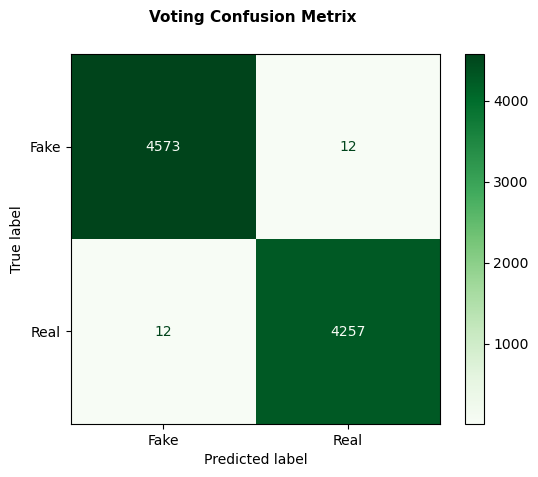

In [57]:
#confusion matrix for Voting
con_out = metrics.confusion_matrix(val_test, Voting_predict)
rt="Voting Confusion Metrix "
con_matrix_fun(con_out,rt)

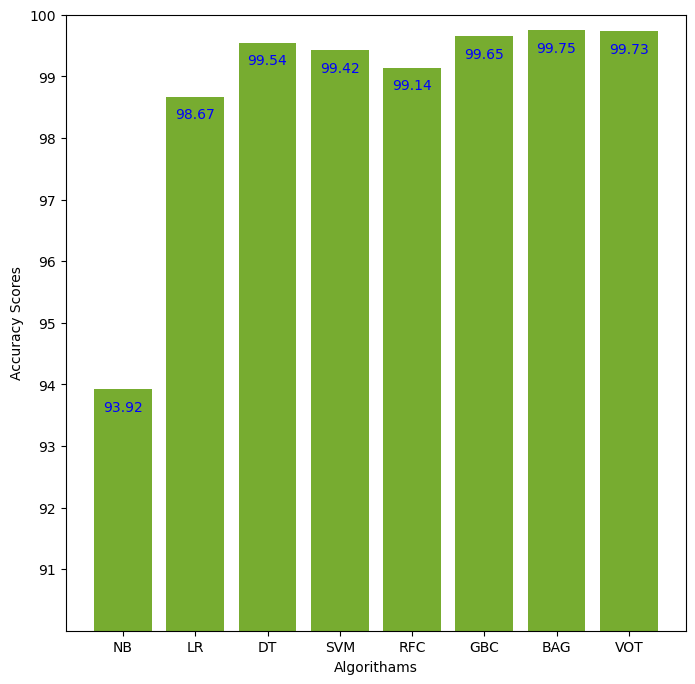

In [58]:
# comparing different models in term of accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
lst=list(char_acc.values())
plt.bar(list(char_acc.keys()),list(char_acc.values()),color='#77AC30')
#plt.title('Accuracy of Algorithams ')
plt.xlabel('Algorithams')
plt.ylabel('Accuracy Scores')
plt.ylim(90,100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))
for j in range(len(lst)):
    plt.text(j, lst[j] - 0.4, str(lst[j]), va='bottom',ha='center',color='blue')
    


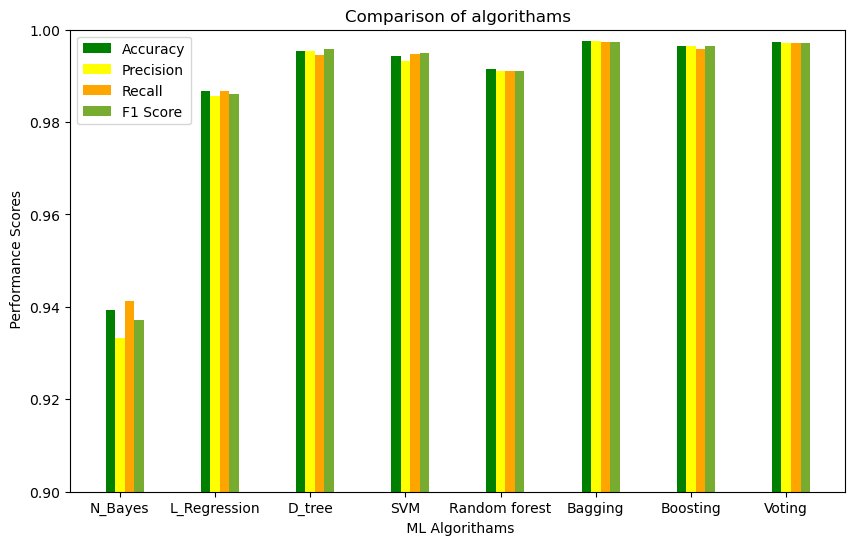

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# algorithms scores
ML_algo = ['N_Bayes', 'L_Regression', 'D_tree', 'SVM','Random forest','Bagging','Boosting','Voting']
scr_acc = [0.9392,0.9867,0.9954,0.9943,0.9914,0.9975,0.9965,0.9973]  
scr_prec =[0.9333,0.9857,0.9953,0.9932,0.9910,0.9975,0.9965,0.9972]
scr_rec =[0.9412,0.9866,0.9946,0.9948,0.9911,0.9974,0.9958,0.9972]
scr_f1 =[0.9372,0.9861,0.9958,0.9950,0.9910,0.9974,0.9964,0.9971]

# bars position on x axis
new_var= np.arange(len(ML_algo))
gap = 0.1 # gap between the bars
plt.figure(figsize=(10, 6))
plt.bar(new_var, scr_acc, gap, label='Accuracy', color='green')
plt.bar(new_var + gap, scr_prec, gap, label='Precision', color='yellow')
plt.bar(new_var + 2 * gap, scr_rec, gap, label='Recall', color='orange')
plt.bar(new_var + 3 * gap, scr_f1, gap, label='F1 Score', color='#77AC31')
plt.xlabel(' ML Algorithams')
plt.ylabel(' Performance Scores')
plt.title('Comparison of algorithams')
plt.xticks(new_var + gap, ML_algo)
plt.ylim(0.9, 1)  
plt.legend()
plt.show()

In [60]:
#testing of models
def fun_val(val):
    if val == 0:
        return "This is a fake news"
    elif val == 1:
        return "This is a true news"
     
    

def  testing_algo(data):
    data_testing = {"text":[data]}
    data_test_new = pd.DataFrame(data_testing)
    data_test_new["text"] = data_test_new["text"].apply(change_prepro)
    data_news_test = data_test_new["text"]
   
    NB_prediction= NB_pipe.predict(data_news_test)
    LR_prediction = LR_pipe.predict(data_news_test)
    SVM_prediction = SVM_pipe.predict(data_news_test)
    RF_prediction=RF_pipe.predict(data_news_test)
    BO_prediction=GBC_pipe.predict(data_news_test)
    BAG_prediction=BAG_pipe.predict(data_news_test)
    VOT_prediction=voting_clf.predict(data_news_test)
    DT_prediction=DT_pipe.predict(data_news_test)

    return print("\n\nNB Predicts that : {} \nLR Predicts that : {} \nSVM Predicts that : {} \nRF Predicts that : {} \nBO Predicts that : {} \nBAG Predicts that : {} \nVOT Predicts that : {} \nDT Predicts that : {}".format(fun_val(NB_prediction[0]),
     fun_val(LR_prediction[0]), fun_val(SVM_prediction[0]), fun_val(RF_prediction[0]),fun_val(BO_prediction[0]),fun_val(BAG_prediction[0]),fun_val(VOT_prediction[0]),fun_val(DT_prediction[0])))
    
 



In [ ]:

data = str(input())
testing_algo(data) 
